## LABORATORY 04: MACHINE LEARNING II - CLASSIFICATION PROBLEM

### Case of Study 02: Credit Score Classification

- The dataset consists of 8068 rows and 11 columns representing classify the customers into four segments

#### 1. Load the dataset

In [80]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn 
import seaborn as sbn
import scripts

In [81]:
# load train and test set
dataset = pd.read_csv("dataset/Train.csv", sep = ",", low_memory = False)
test_set = pd.read_csv("dataset/Test.csv", sep = ",", low_memory = False)
dataset.head(5)

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [82]:
# dimensions of dataset
print("#Train-samples = ", dataset.shape[0])
print("#Train-features = ", dataset.shape[1])
print("#Test-samples = ", test_set.shape[0])
print("#Test-features = ", test_set.shape[1])

#Train-samples =  8068
#Train-features =  11
#Test-samples =  2627
#Test-features =  11


In [83]:
# definition of preprocessor
from scripts.preprocess import DataPreprocessing

dp = DataPreprocessing()
metadata, num_cols, cat_cols = dp.get_metadata(dataset)

print(f"Metadata ==> total: {len(metadata)} \n", metadata)
print("Numerical features: \n", num_cols)
print("Categorical features: \n", cat_cols)

Metadata ==> total: 11 
 Index(['ID', 'Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession',
       'Work_Experience', 'Spending_Score', 'Family_Size', 'Var_1',
       'Segmentation'],
      dtype='object')
Numerical features: 
 ['ID', 'Age', 'Work_Experience', 'Family_Size']
Categorical features: 
 ['Gender', 'Ever_Married', 'Graduated', 'Profession', 'Spending_Score', 'Var_1', 'Segmentation']


#### 2. Data Cleaning

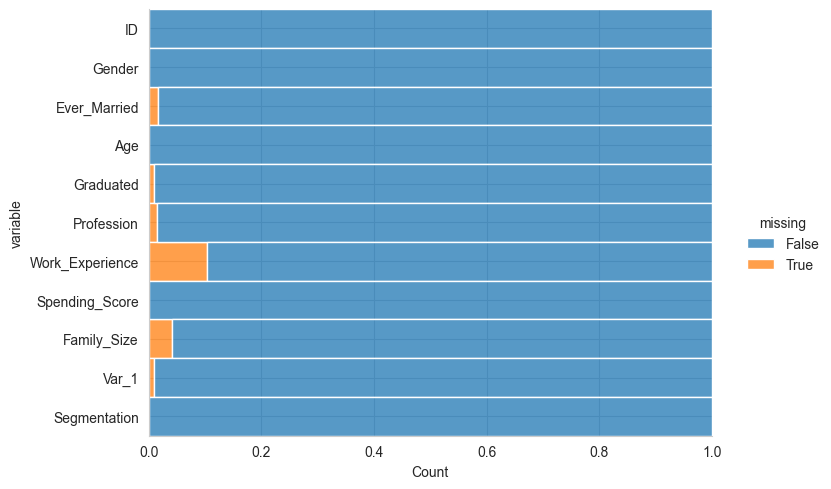

In [84]:
dp.filter_missing(dataset)

Master function to clean data

In [85]:
cat_cols

['Gender',
 'Ever_Married',
 'Graduated',
 'Profession',
 'Spending_Score',
 'Var_1',
 'Segmentation']

In [86]:
dataset["Work_Experience"].head(15)

0     1.0
1     NaN
2     1.0
3     0.0
4     NaN
5     0.0
6     1.0
7     1.0
8     0.0
9     1.0
10    1.0
11    4.0
12    0.0
13    NaN
14    0.0
Name: Work_Experience, dtype: float64

In [87]:
# function to clean dataset
def clean_data(frame, is_test=False):
    # drop all duplicate values
    frame = frame.drop_duplicates()
    # drop non-important columns
    frame = frame.drop(columns=['ID', 'Var_1'], axis=1)
    
    # List of categorical columns
    categorical_columns = ['Ever_Married', 'Graduated', 'Profession']
    
    # Filling gaps in categorical columns with the most frequent values
    for col in categorical_columns:
        frame[col] = frame[col].fillna(frame[col].mode()[0])

    # Filling gaps with median in Work_Experience and Family_Size columns
    frame['Work_Experience'] = frame['Work_Experience'].fillna(frame['Work_Experience'].median())
    frame['Family_Size'] = frame['Family_Size'].fillna(frame['Family_Size'].median())

    return frame

Cleaned dataset

In [88]:
dataset = clean_data(dataset)
dataset.head(5)

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Segmentation
0,Male,No,22,No,Healthcare,1.0,Low,4.0,D
1,Female,Yes,38,Yes,Engineer,1.0,Average,3.0,A
2,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,B
3,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,B
4,Female,Yes,40,Yes,Entertainment,1.0,High,6.0,A


Redefine metadata

In [89]:
metadata, num_cols, cat_cols = dp.get_metadata(dataset)

print(f"Metadata ==> total: {len(metadata)} \n", metadata)
print("Numerical features: \n", num_cols)
print("Categorical features: \n", cat_cols)

Metadata ==> total: 9 
 Index(['Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession',
       'Work_Experience', 'Spending_Score', 'Family_Size', 'Segmentation'],
      dtype='object')
Numerical features: 
 ['Age', 'Work_Experience', 'Family_Size']
Categorical features: 
 ['Gender', 'Ever_Married', 'Graduated', 'Profession', 'Spending_Score', 'Segmentation']


#### 3. Exploratory Data Analysis

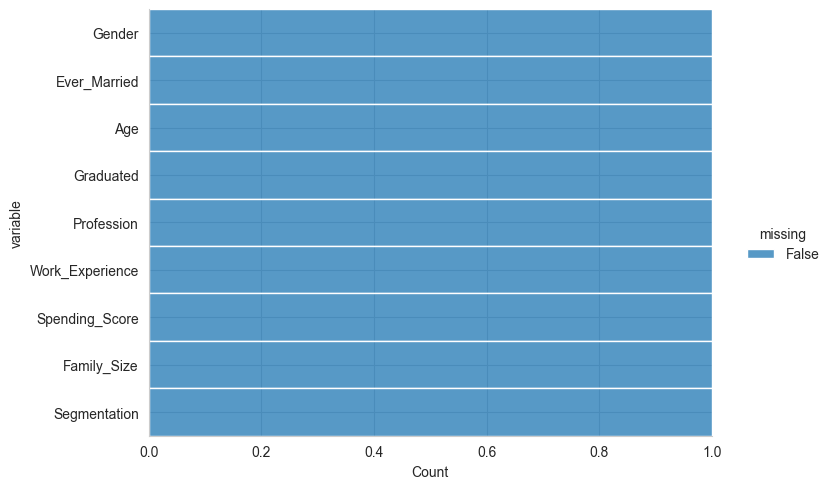

0


In [90]:
# filter missing values
dp.filter_missing(dataset)
print(dataset.isnull().sum().sum())

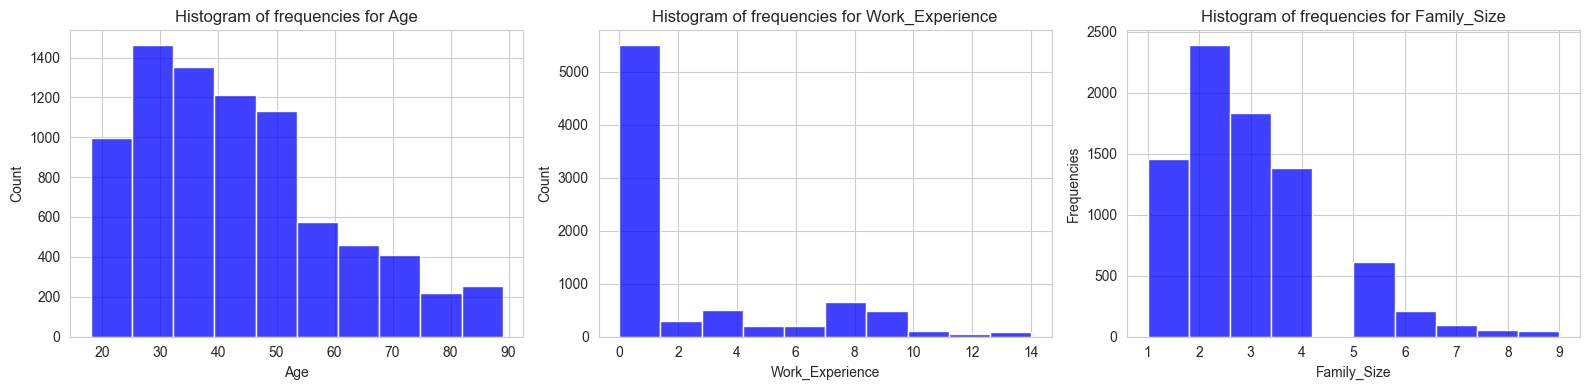

In [91]:
# plot the histogram of frequencies for numerical features
dp.hist_frequencies(dataset, num_cols, bins = 10)

In [92]:
# check the behavior of categorical features
dp.get_categorical_instances(dataset, cat_cols)


***** Gender ******
Gender
Male      4417
Female    3651
Name: count, dtype: int64

***** Ever_Married ******
Ever_Married
Yes    4783
No     3285
Name: count, dtype: int64

***** Graduated ******
Graduated
Yes    5046
No     3022
Name: count, dtype: int64

***** Profession ******
Profession
Artist           2640
Healthcare       1332
Entertainment     949
Engineer          699
Doctor            688
Lawyer            623
Executive         599
Marketing         292
Homemaker         246
Name: count, dtype: int64

***** Spending_Score ******
Spending_Score
Low        4878
Average    1974
High       1216
Name: count, dtype: int64

***** Segmentation ******
Segmentation
D    2268
A    1972
C    1970
B    1858
Name: count, dtype: int64


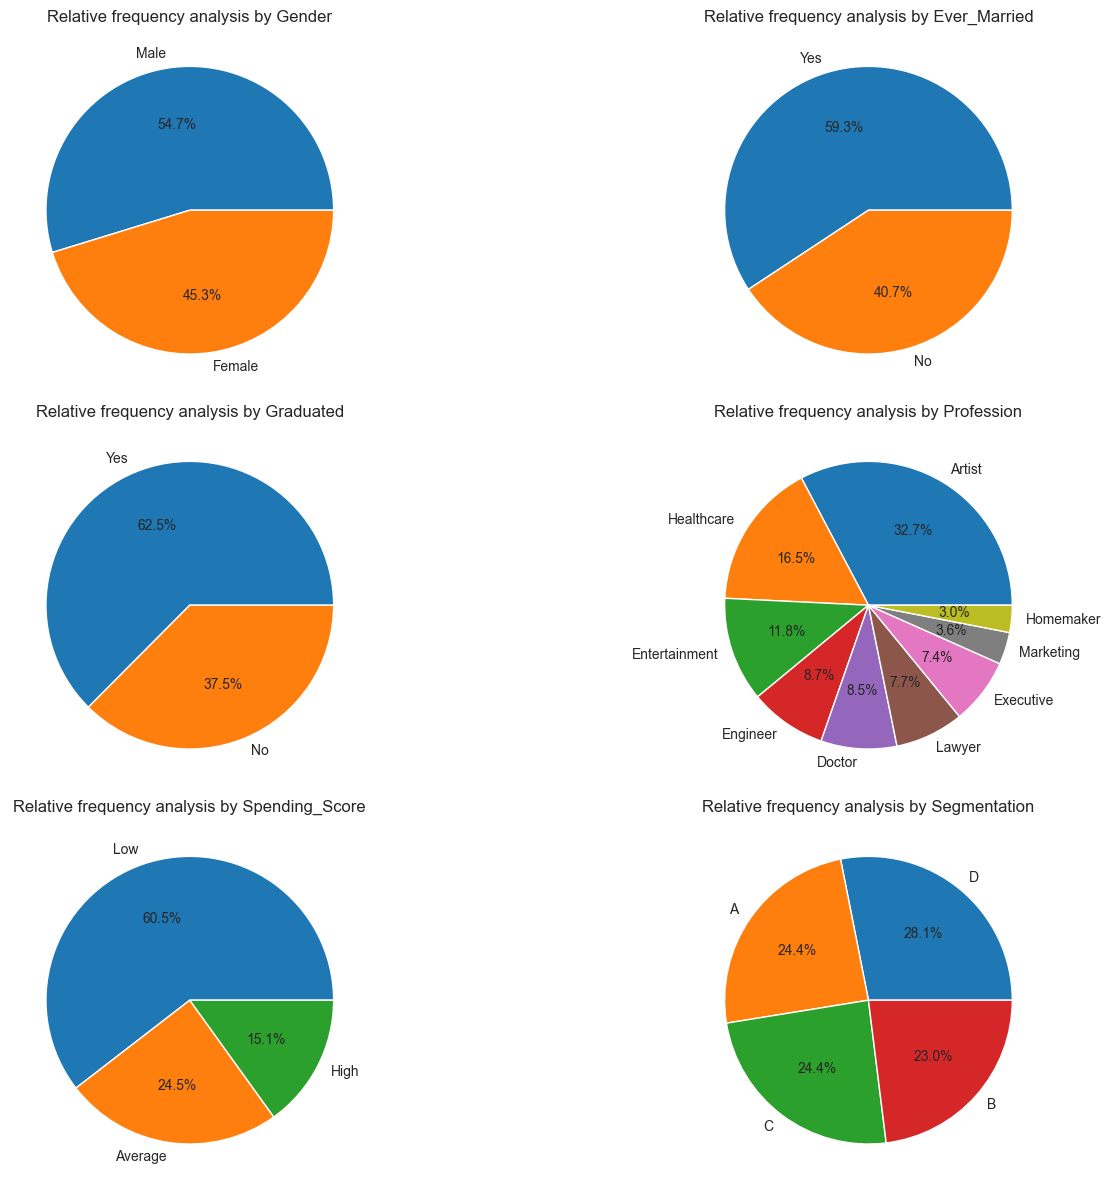

In [93]:
# iteratively pie chart
dp.iter_piechart(dataset, cat_cols)

#### 4. Data preprocessing

In [94]:
# split independent and dependent variables
x = dataset.loc[:, dataset.columns != "Spending_Score"]
y = dataset["Spending_Score"]

In [95]:
x.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Family_Size,Segmentation
0,Male,No,22,No,Healthcare,1.0,4.0,D
1,Female,Yes,38,Yes,Engineer,1.0,3.0,A
2,Female,Yes,67,Yes,Engineer,1.0,1.0,B
3,Male,Yes,67,Yes,Lawyer,0.0,2.0,B
4,Female,Yes,40,Yes,Entertainment,1.0,6.0,A


In [96]:
print("Dimension of features = ", x.shape)
print("Dimension of target = ", y.shape)

Dimension of features =  (8068, 8)
Dimension of target =  (8068,)


Split train and test set

In [97]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

print("X-train dim: ", x_train.shape)
print("Y-train: ", len(y_train))
print("X-test dim: ", x_test.shape)
print("Y-test: ", len(y_test))

X-train dim:  (6454, 8)
Y-train:  6454
X-test dim:  (1614, 8)
Y-test:  1614


Transforming the numerical and categorical features  

* Numerical features: 
 ["Age", "Work_Experience", "Family_Size"]   
  
* Categorical features:   
 ["Gender", "Profession", "Segmentation"]  

In [99]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import OneHotEncoder

transformer = make_column_transformer(
    (StandardScaler(), ["Age"]),  
    (RobustScaler(), ["Work_Experience", "Family_Size"]),
    (OneHotEncoder(handle_unknown="ignore"), ["Gender", "Profession", "Segmentation"])    
)

In [100]:
# transformer will learn only from training data
transformer.fit(x_train)

ColumnTransformer(transformers=[('standardscaler', StandardScaler(), ['Age']),
                                ('robustscaler', RobustScaler(),
                                 ['Work_Experience', 'Family_Size']),
                                ('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 ['Gender', 'Profession', 'Segmentation'])])

In [101]:
# transformer will transform the train and test data
x_train = transformer.transform(x_train)
x_test = transformer.transform(x_test)

In [102]:
x_train

array([[-0.61859002,  0.        ,  1.        , ...,  1.        ,
         0.        ,  0.        ],
       [ 0.58225217, -0.33333333, -1.        , ...,  1.        ,
         0.        ,  0.        ],
       [-0.37842158,  0.        , -1.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.13825314,  2.66666667,  0.        , ...,  1.        ,
         0.        ,  0.        ],
       [ 1.78309435,  0.        ,  0.        , ...,  0.        ,
         1.        ,  0.        ],
       [ 0.46216795,  0.        , -0.5       , ...,  1.        ,
         0.        ,  0.        ]])

In [103]:
y_train

4871        Low
7794        Low
3161        Low
5140    Average
9       Average
         ...   
4931       High
3264        Low
1653        Low
2607    Average
2732        Low
Name: Spending_Score, Length: 6454, dtype: object

In [104]:
classes = np.unique(y)
print("Avalilable classes: ", classes)

Avalilable classes:  ['Average' 'High' 'Low']


#### 5. Building Models

Benchmark for Models
* KNN
* SVM
* Random Forest
* XGBoost Classifier
* LightGBM Classifier

In [105]:
%reload_ext autoreload
%autoreload 2

KNN Classifier

In [106]:
from scripts.classifiers import KNNModel
import time

# train model
sttrain_knn = time.time()
knn = KNNModel()
knn_model = knn.train(x_train, y_train)

# calculate time
ettrain_knn = time.time()
ttrain_knn = ettrain_knn - sttrain_knn
print(f"Time of training KNN: {ttrain_knn:.3f} seconds")

Best KNN Parameters: {'algorithm': 'ball_tree', 'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'uniform'}
Time of training KNN: 9.560 seconds


d:\education\Семинар по специальности\problem_classification\Specialized_Topics_AI-ML-5130203\lesson04\venv\Lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,
d:\education\Семинар по специальности\problem_classification\Specialized_Topics_AI-ML-5130203\lesson04\venv\Lib\site-packages\sklearn\model_selection\_search.py:1103: UserWarning: One or more of the test scores are non-finite: [0.73814626 0.72822942 0.7479101  0.73721711        nan 0.72605984
        nan 0.73597644 0.73613244 0.72730003 0.74775506 0.73721687
 0.73876738 0.7259048  0.74899453 0.73597656 0.73706171 0.72760963
 0.7474451  0.73690703 0.73892241 0.72544005 0.74821958 0.73566672]
  warnings.warn(


In [107]:
knn_model

KNeighborsClassifier(algorithm='ball_tree', metric='manhattan', n_neighbors=7)

In [110]:
# make predictions
print("real values in train: ", y_train[0:10].values)
print("predicted values in train: ", knn_model.predict(x_train[0:10]))
print("real values in test: ", y_test[0:10].values)
print("predicted values in test: ", knn_model.predict(x_test[0:10]))

real values in train:  ['Low' 'Low' 'Low' 'Average' 'Average' 'Low' 'High' 'Low' 'Low' 'Low']
predicted values in train:  ['Low' 'Low' 'Low' 'Average' 'Average' 'Low' 'Low' 'Low' 'Low' 'Low']
real values in test:  ['High' 'Low' 'High' 'Low' 'Low' 'High' 'Average' 'Low' 'Average' 'Low']
predicted values in test:  ['High' 'Low' 'High' 'Low' 'Average' 'High' 'Average' 'Low' 'Average'
 'Low']


In [112]:
# deploy knn model
from scripts.deploy import DeployClassifier
DeployClassifier(path="models").save_model(filename="knn_v1.pkl", model=knn_model)

In [113]:
# evaluate knn model
from scripts.evaluator import EvalClassifier
rec_knn = DeployClassifier(path = "models").load_model(filename="knn_v1.pkl")
eval_knn = EvalClassifier(model = rec_knn)

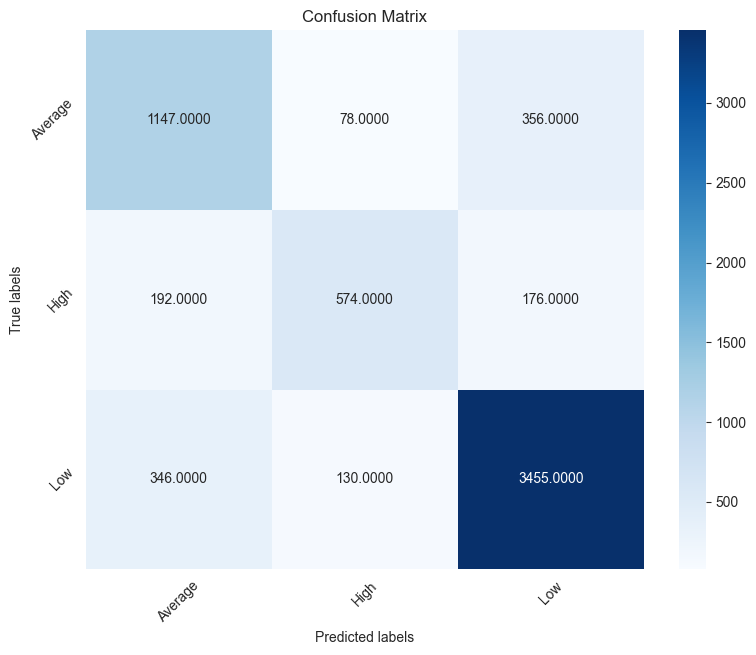

In [114]:
# get confusion matrix in training
y_pred = rec_knn.predict(x_train)
cmknn_train = eval_knn.get_confusion_matrix(y_train.values, y_pred, classes)
eval_knn.plot_confusion_matrix(cmknn_train, classes)

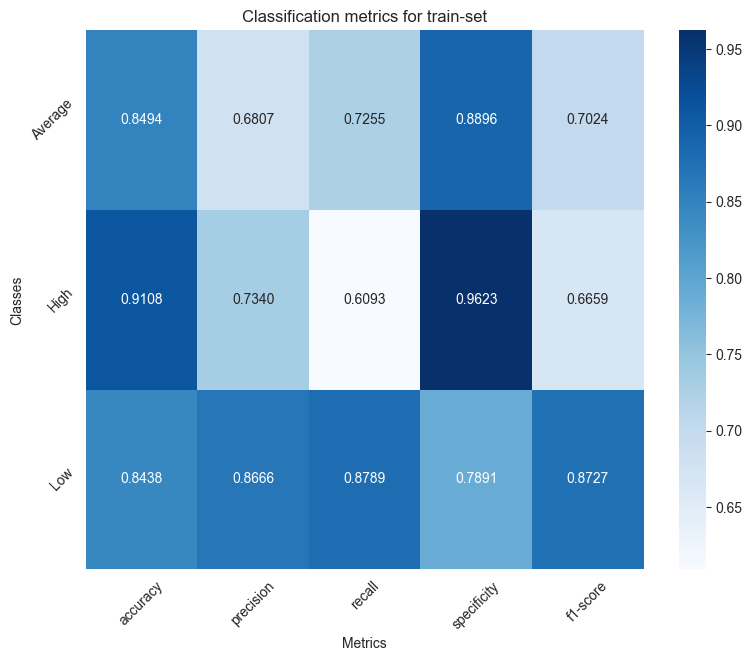

In [115]:
metrics_train_knn = eval_knn.calculate_metrics_by_class(cmknn_train, classes)
eval_knn.plot_metrics_by_class(metrics_train_knn, "Classification metrics for train-set")

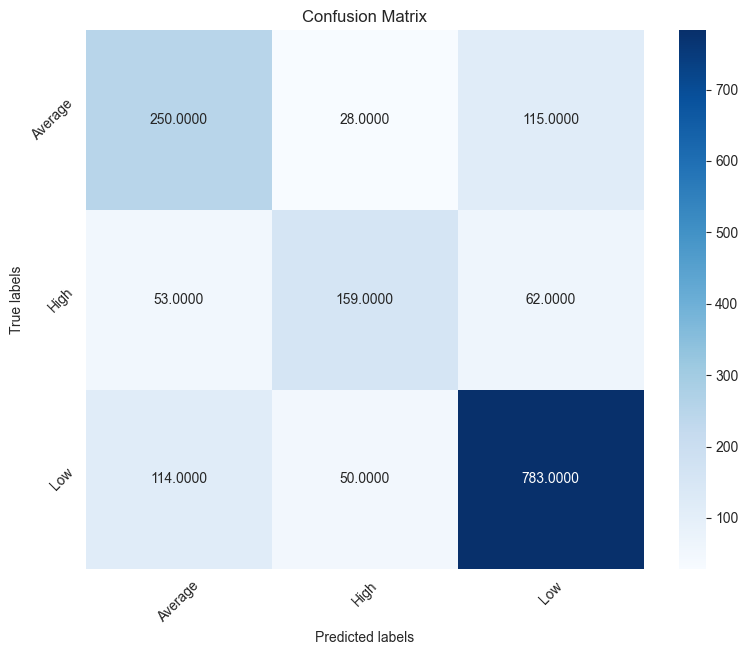

In [116]:
# get confusion matrix in testing
y_pred = rec_knn.predict(x_test)
cmknn_test = eval_knn.get_confusion_matrix(y_test, y_pred, classes)
eval_knn.plot_confusion_matrix(cmknn_test, classes)

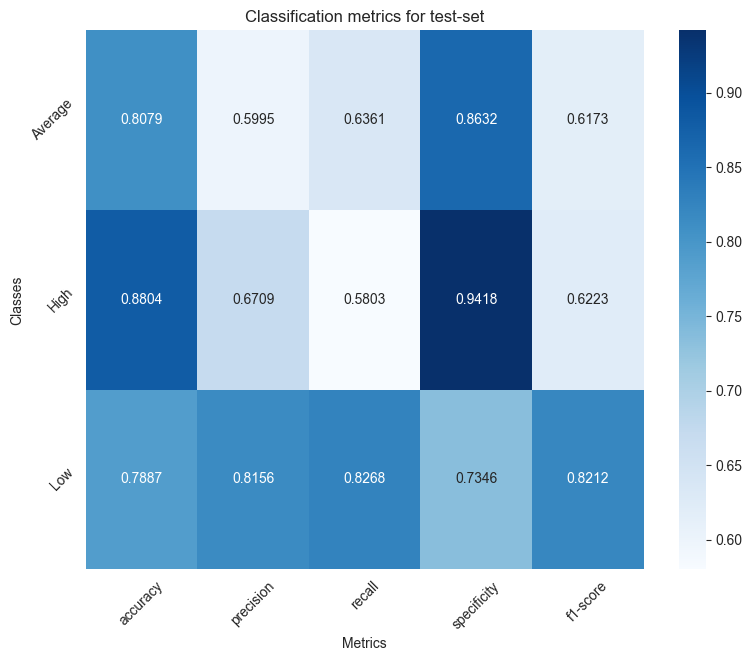

In [117]:
metrics_test_knn = eval_knn.calculate_metrics_by_class(cmknn_test, classes)
eval_knn.plot_metrics_by_class(metrics_test_knn, "Classification metrics for test-set")

In [118]:
# calculate the metrics for whole test set
eval_knn.calculate_metrics_xall(cmknn_test, metrics_test_knn)

,accuracy,precision,recall,specificity,f1-score
Mean-metrics,0.738538,0.695344,0.681082,0.84655,0.686926


SVM Classifier

In [119]:
from scripts.classifiers import SVMModel
import time

# train model
sttrain_svm = time.time()
svm = SVMModel()
svm_model = svm.train(x_train, y_train)

# calculate time
ettrain_svm = time.time()
ttrain_svm = ettrain_svm - sttrain_svm
print(f"Time of training SVM: {ttrain_svm:.3f} seconds")

Best SVM Parameters: {'C': 1, 'class_weight': 'balanced', 'degree': 2, 'gamma': 'scale', 'kernel': 'rbf'}
Time of training SVM: 39.641 seconds


In [120]:
svm_model

SVC(C=1, class_weight='balanced', degree=2)

In [121]:
# make predictions
print("real values in train: ", y_train[0:10].values)
print("predicted values in train: ", svm_model.predict(x_train[0:10]))
print("real values in test: ", y_test[0:10].values)
print("predicted values in test: ", svm_model.predict(x_test[0:10]))

real values in train:  ['Low' 'Low' 'Low' 'Average' 'Average' 'Low' 'High' 'Low' 'Low' 'Low']
predicted values in train:  ['Low' 'Low' 'Low' 'Average' 'Average' 'Low' 'High' 'Low' 'Low' 'Low']
real values in test:  ['High' 'Low' 'High' 'Low' 'Low' 'High' 'Average' 'Low' 'Average' 'Low']
predicted values in test:  ['High' 'Low' 'High' 'Average' 'Average' 'High' 'High' 'Low' 'Average'
 'Low']


In [122]:
# deploy svm model
from scripts.deploy import DeployClassifier
DeployClassifier(path="models").save_model(filename="svm_v1.pkl", model=svm_model)

In [123]:
# evaluate svm model
from scripts.evaluator import EvalClassifier
rec_svm = DeployClassifier(path = "models").load_model(filename="svm_v1.pkl")
eval_svm = EvalClassifier(model = rec_svm)

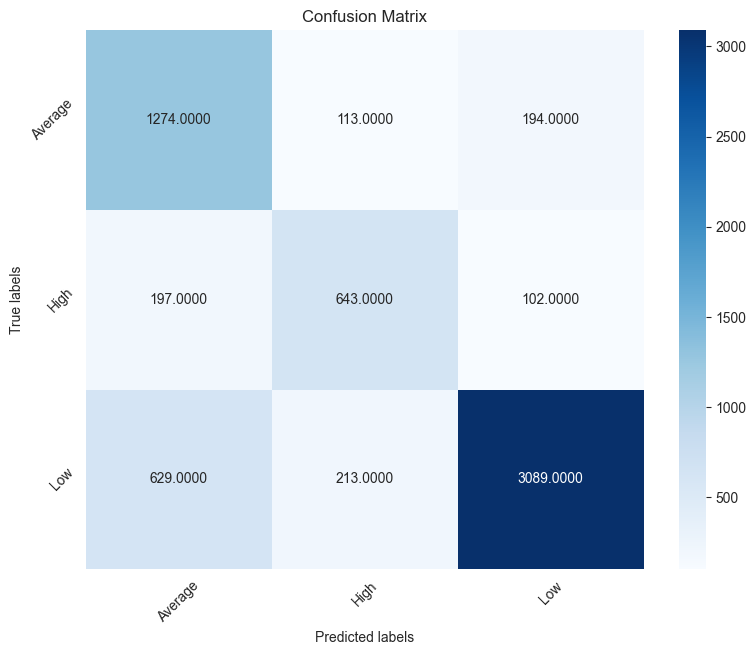

In [124]:
# get confusion matrix in training
y_pred = rec_svm.predict(x_train)
cmsvm_train = eval_svm.get_confusion_matrix(y_train.values, y_pred, classes)
eval_svm.plot_confusion_matrix(cmsvm_train, classes)

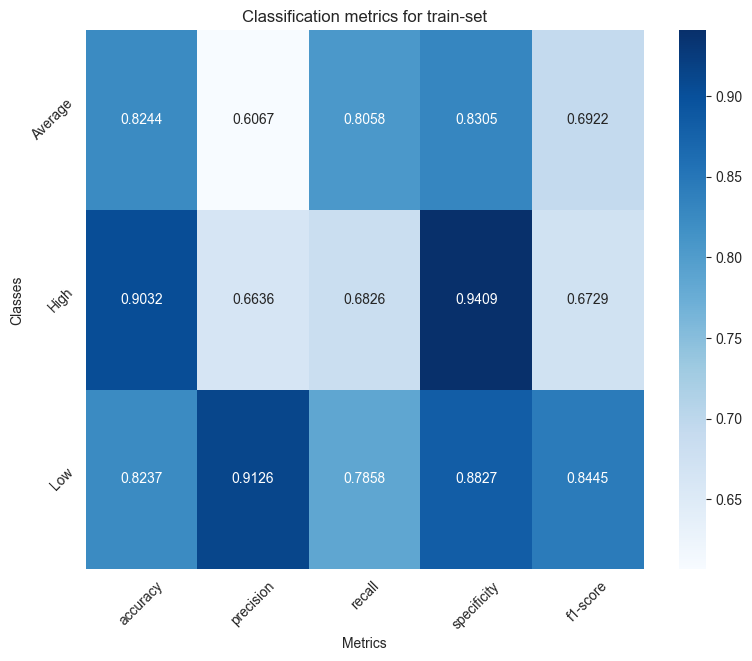

In [125]:
metrics_train_svm = eval_svm.calculate_metrics_by_class(cmsvm_train, classes)
eval_svm.plot_metrics_by_class(metrics_train_svm, "Classification metrics for train-set")

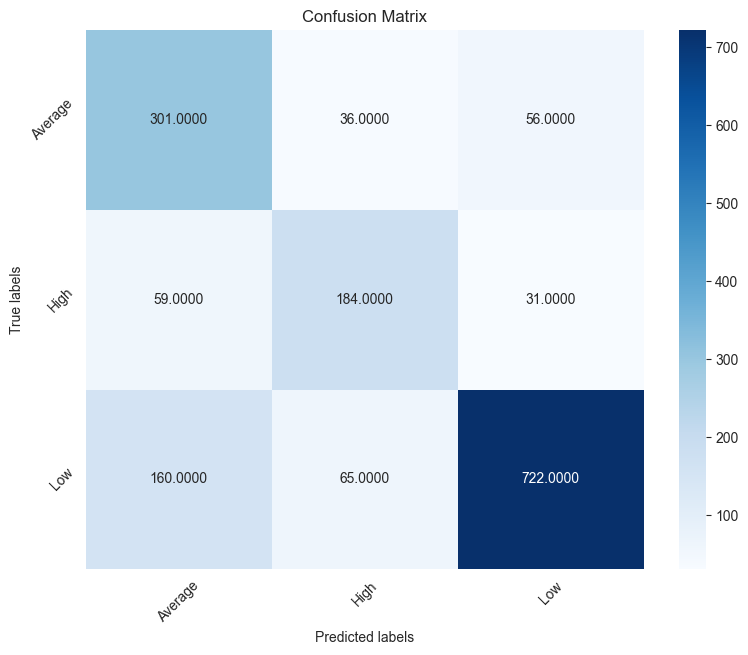

In [127]:
# get confusion matrix in testing
y_pred = rec_svm.predict(x_test)
cmsvm_test = eval_svm.get_confusion_matrix(y_test, y_pred, classes)
eval_svm.plot_confusion_matrix(cmsvm_test, classes)

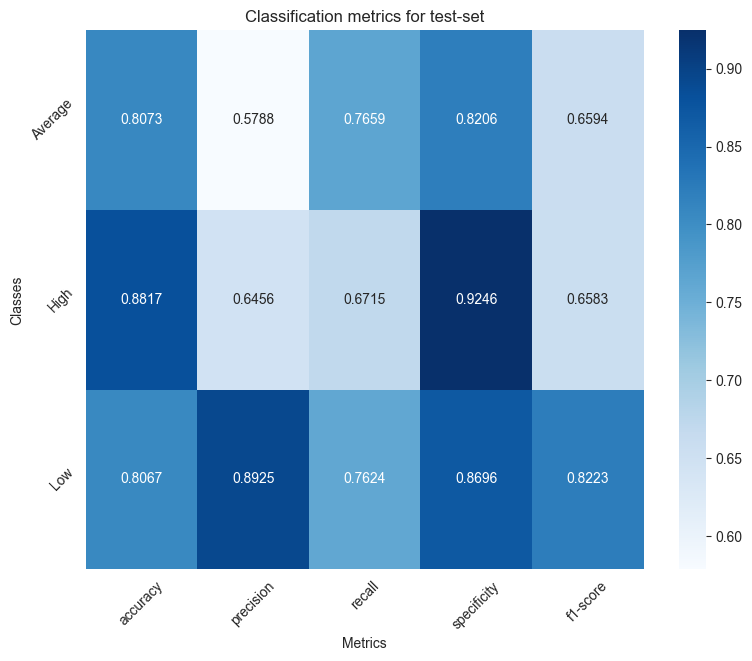

In [128]:
metrics_test_svm = eval_svm.calculate_metrics_by_class(cmsvm_test, classes)
eval_svm.plot_metrics_by_class(metrics_test_svm, "Classification metrics for test-set")

In [129]:
# calculate the metrics for whole test set
eval_svm.calculate_metrics_xall(cmsvm_test, metrics_test_svm)

,accuracy,precision,recall,specificity,f1-score
Mean-metrics,0.747831,0.70564,0.733281,0.87161,0.713336


Random Forest Classifier

In [130]:
from scripts.classifiers import RandomForestModel
import time

# train model
sttrain_rf = time.time()
rf = RandomForestModel()
rf_model = rf.train(x_train, y_train)

# calculate time
ettrain_rf = time.time()
ttrain_rf = ettrain_rf - sttrain_rf
print(f"Time of training Random Forest: {ttrain_rf:.3f} seconds")

Best Random Forest Parameters: {'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 20, 'n_estimators': 20}
Time of training Random Forest: 10.879 seconds


d:\education\Семинар по специальности\problem_classification\Specialized_Topics_AI-ML-5130203\lesson04\venv\Lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


In [131]:
rf_model

RandomForestClassifier(max_depth=30, min_samples_leaf=4, min_samples_split=20,
                       n_estimators=20)

In [132]:
# make predictions
print("real values in train: ", y_train[0:10].values)
print("predicted values in train: ", rf_model.predict(x_train[0:10]))
print("real values in test: ", y_test[0:10].values)
print("predicted values in test: ", rf_model.predict(x_test[0:10]))

real values in train:  ['Low' 'Low' 'Low' 'Average' 'Average' 'Low' 'High' 'Low' 'Low' 'Low']
predicted values in train:  ['Low' 'Low' 'Low' 'Low' 'Average' 'Low' 'Low' 'Low' 'Low' 'Low']
real values in test:  ['High' 'Low' 'High' 'Low' 'Low' 'High' 'Average' 'Low' 'Average' 'Low']
predicted values in test:  ['High' 'Low' 'High' 'Low' 'Average' 'High' 'Low' 'Low' 'Average' 'Low']


In [133]:
# deploy rf model
from scripts.deploy import DeployClassifier
DeployClassifier(path="models").save_model(filename="rf_v1.pkl", model=rf_model)

In [134]:
# evaluate rf model
from scripts.evaluator import EvalClassifier
rec_rf = DeployClassifier(path = "models").load_model(filename="rf_v1.pkl")
eval_rf = EvalClassifier(model = rec_rf)

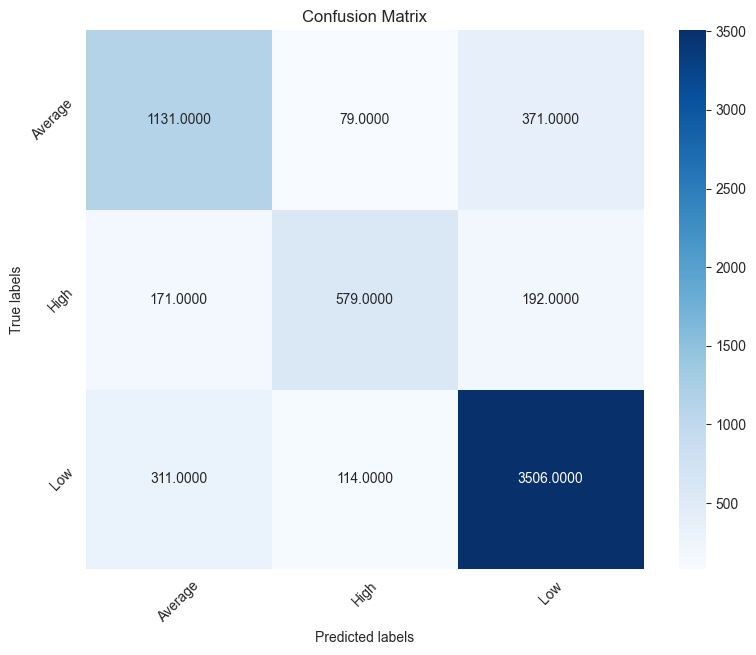

In [135]:
# get confusion matrix in training
y_pred = rec_rf.predict(x_train)
cmrf_train = eval_rf.get_confusion_matrix(y_train.values, y_pred, classes)
eval_rf.plot_confusion_matrix(cmrf_train, classes)

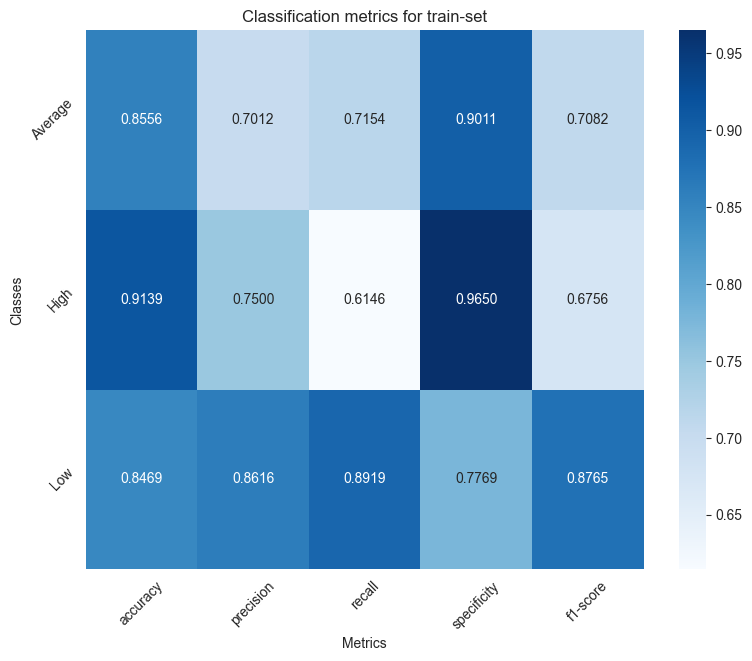

In [136]:
metrics_train_rf = eval_knn.calculate_metrics_by_class(cmrf_train, classes)
eval_rf.plot_metrics_by_class(metrics_train_rf, "Classification metrics for train-set")

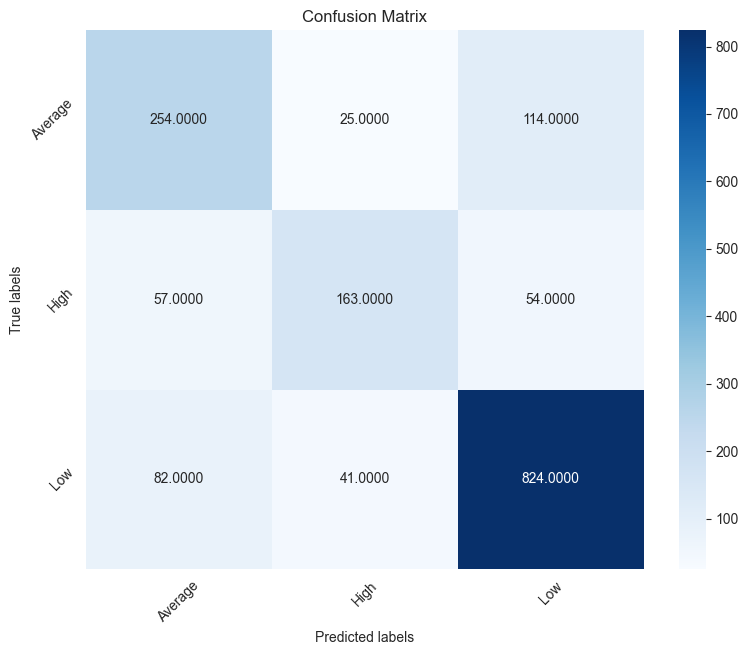

In [138]:
# get confusion matrix in testing
y_pred = rec_rf.predict(x_test)
cmrf_test = eval_rf.get_confusion_matrix(y_test, y_pred, classes)
eval_rf.plot_confusion_matrix(cmrf_test, classes)

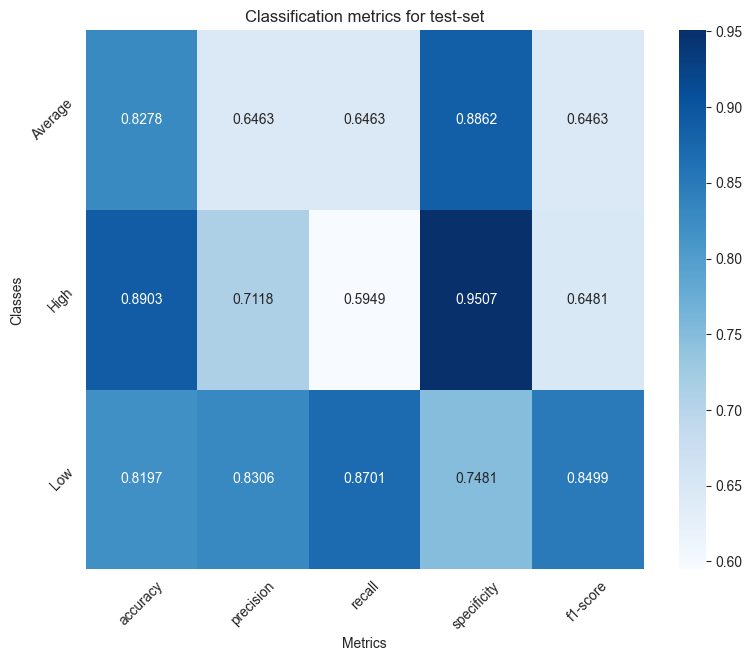

In [139]:
metrics_test_rf = eval_rf.calculate_metrics_by_class(cmrf_test, classes)
eval_rf.plot_metrics_by_class(metrics_test_rf, "Classification metrics for test-set")

In [140]:
# calculate the metrics for whole test set
eval_rf.calculate_metrics_xall(cmrf_test, metrics_test_rf)

,accuracy,precision,recall,specificity,f1-score
Mean-metrics,0.768897,0.729582,0.703772,0.861677,0.714781


XGBoost Classifier

LightGBM Classifier

Monitoring using Benchmarks